# Урок 6. Наивный байесовский классификатор

В уроке мы подробно рассмотрели, как работает наивный байесовский классификатор, на примере частотной таблицы. Такие данные на практике встречаются довольно редко (если вы не работаете с классификацией текстов), поэтому сейчас предлагаем самостоятельно разобрать принцип работы гауссовского наивного Байеса, который можно встретить чаще остальных.

### 1.
Посмотрите, что включает в себя новый датасет Wine, где собраны результаты химического анализа вин, выращенных в одном регионе Италии тремя различными культиваторами. В наборе каждый из объектов имеет 13 числовых признаков.

Изучите попарные графики признаков (в уроках мы рассматривали их с помощью функции pd.plotting.scatter_matrix() ) и выберите такие два признака, используя которые, на ваш взгляд, можно будет лучше всего разделить данные по трем классам. Помните о том, что модель гауссовского наивного Байеса использует для предсказаний среднее и разброс значений признаков относительно среднего, поэтому вероятнее всего, лучшими признаками будут те, значения которых на графике разбросаны примерно одинаково от среднего значения, но как можно меньше накладываются на признаки других классов.

*Примечание: для наглядности в параметрах функции построения графиков примените figsize=(25, 25) - это позволит отобразить график достаточного размера для того, чтобы его изучить.*

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
from matplotlib import pyplot as plt

<Figure size 2500x2500 with 0 Axes>

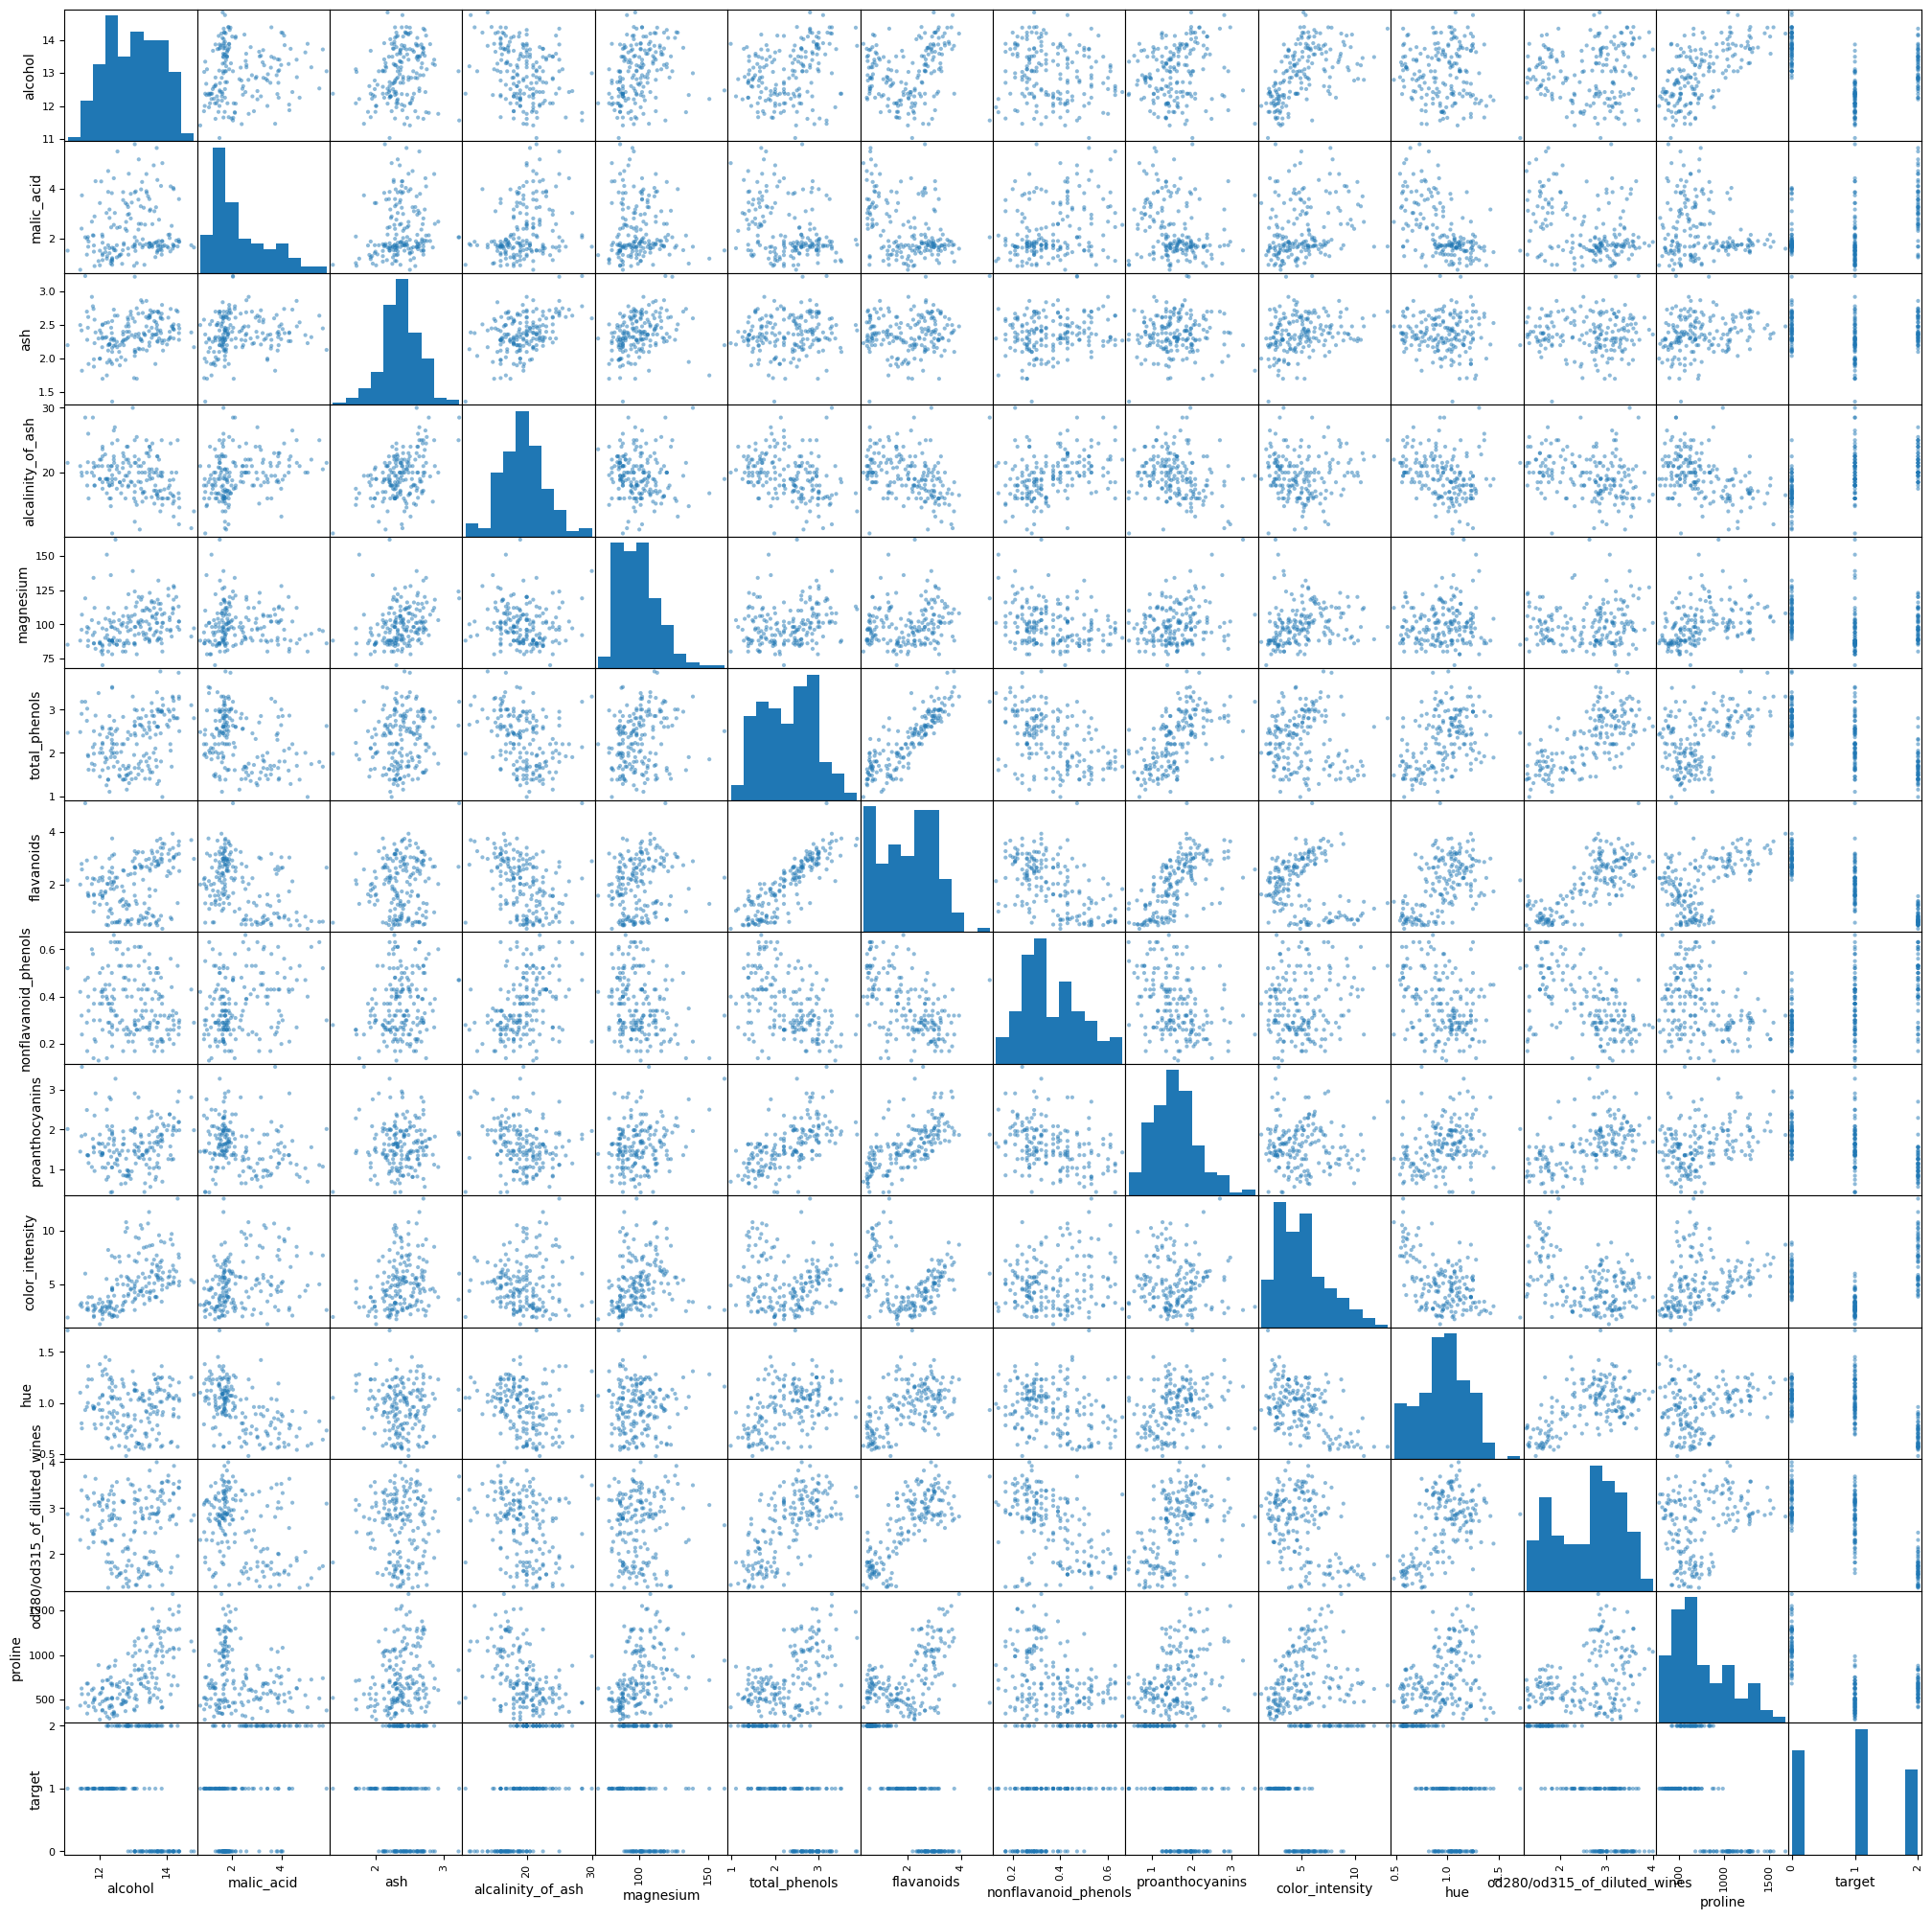

In [2]:
# Загрузка данных
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

# Построение попарных графиков
plt.figure(figsize=(25, 25))
pd.plotting.scatter_matrix(df_wine, figsize=(25, 25))
plt.show()

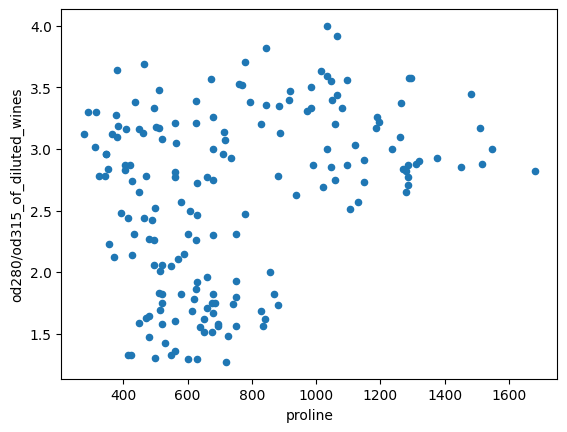

In [12]:
# Выберем следующие признаки: flavanoids и od280/od315_of_diluted_wines под номерами 13 и 12 соответственно
df_wine.plot(x='proline', y='od280/od315_of_diluted_wines', kind='scatter')
plt.show()


### 2.
Разбейте данные на тренировочный и тестовый датасеты (при разбиении используйте параметр random_state=17 для воспроизводимости результатов) и постройте модель на двух выбранных признаках. Используя встроенную функцию *score()*, проверьте точность работы модели. Если score() меньше 0.88..., выберите по графику другие два признака и постройте модель на них. Укажите номера признаков, которые вы использовали (помните, что индекс массива признаков начинается с 0).

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from itertools import combinations


feature_names = df_wine.columns.drop('target')
feature_combinations = combinations(feature_names, 2)
results = []
target = df_wine['target']

# Loop over each pair of features
for feature1, feature2 in feature_combinations:
    # Extract the features
    features = df_wine[[feature1, feature2]]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17)
    
    # Train the model
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    
    # Check the accuracy
    score = nb.score(X_test, y_test)
    
    # Append the result to the list
    results.append([feature1, feature2, score])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Feature 1', 'Feature 2', 'Score'])

# Display the DataFrame
results_df.sort_values('Score', ascending=False).head(10)

,Feature 1,Feature 2,Score
77,od280/od315_of_diluted_wines,proline,0.977778
76,hue,proline,0.977778
5,alcohol,flavanoids,0.955556
73,color_intensity,od280/od315_of_diluted_wines,0.955556
72,color_intensity,hue,0.933333
59,flavanoids,color_intensity,0.933333
10,alcohol,od280/od315_of_diluted_wines,0.933333
62,flavanoids,proline,0.933333
60,flavanoids,hue,0.911111
74,color_intensity,proline,0.888889


Номера признаков: 12 и 11 соответственно

### 3.
Еще раз обучите модель на признаках с номерами 11, 12, предварительно снова разбив данные на тренировочные и тестовые (с random_state=17). С помощью функции predict_proba() посмотрите, какие вероятности были вычислены для каждого из классов, и выведите эти вероятности для объекта x_test[0].

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Extract the features 
features = df_wine[['proline', 'od280/od315_of_diluted_wines']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=17)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Get the predicted probabilities for the first test instance
probabilities = nb.predict_proba(X_test)

# Print the probabilities for the first test instance with 5 decimal points
print([round(prob, 5) for prob in probabilities[0]])


[0.00456, 0.99533, 0.00011]


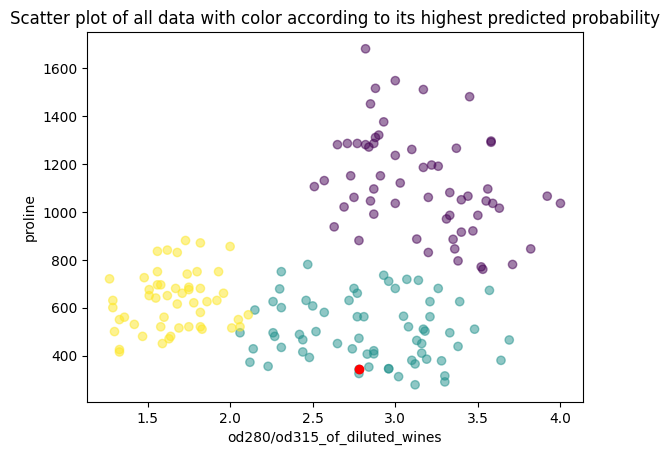

In [19]:
import numpy as np
# import necessary module
# get the predicted probabilities for all data
probabilities_all = nb.predict_proba(features)

# get the color for each data point
colors = np.argmax(probabilities_all, axis=1)

# plot all data with color according to its highest predicted probability
plt.scatter(features[feature1], features[feature2], c=colors, cmap='viridis', alpha=0.5)

# highlight the first point of X_test
plt.scatter(X_test[feature1].iloc[0], X_test[feature2].iloc[0], color='red', marker='o')  

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter plot of all data with color according to its highest predicted probability')
plt.show()


Выбранный элемент находится почти в центре кластера, поэтому его вероятнотсть принадлежности к второму кластеру близка к 1